### Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

### Load the dataset

In [2]:
try:
    url = '/content/SampleSuperstore.csv'
    df=pd.read_csv(url)
except FileNotFoundError:
    print("The file 'SampleSuperstore.csv' was not found.")
    exit()
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Display initial information

In [6]:
df.shape

(9994, 13)

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
# check what every column have
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

Ship Mode : 4
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

********************

Segment : 3
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

********************

Country : 1
Country
United States    9994
Name: count, dtype: int64

********************

City : 531
City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: count, dtype: int64

********************

State : 49
State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64

********************

Postal Code : 631
Postal Code
10035    263
10024    230
10009    229
94122    203
10011    193
Name: count, dtype: int64

********************

Region : 4
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

********************


In [10]:
df.describe(include = 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [11]:
df.duplicated().sum()

17

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [15]:
# check data type
df.dtypes

,0
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
Sales,float64


In [16]:
df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


#EDA

## What is the preferred ship mode?

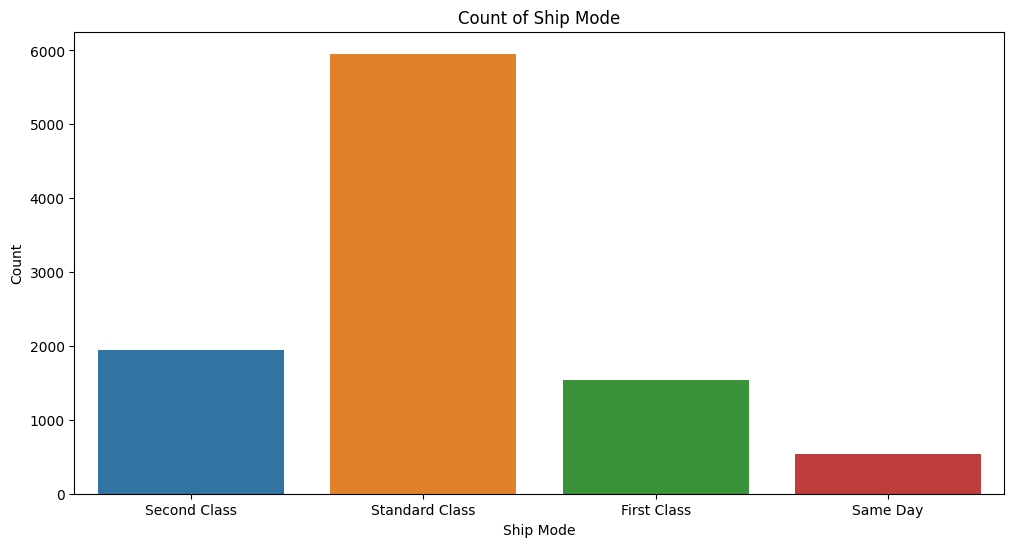

In [17]:
# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Create the count plot
sns.countplot(x='Ship Mode', data=df, hue='Ship Mode')

# Display the plot
plt.title('Count of Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

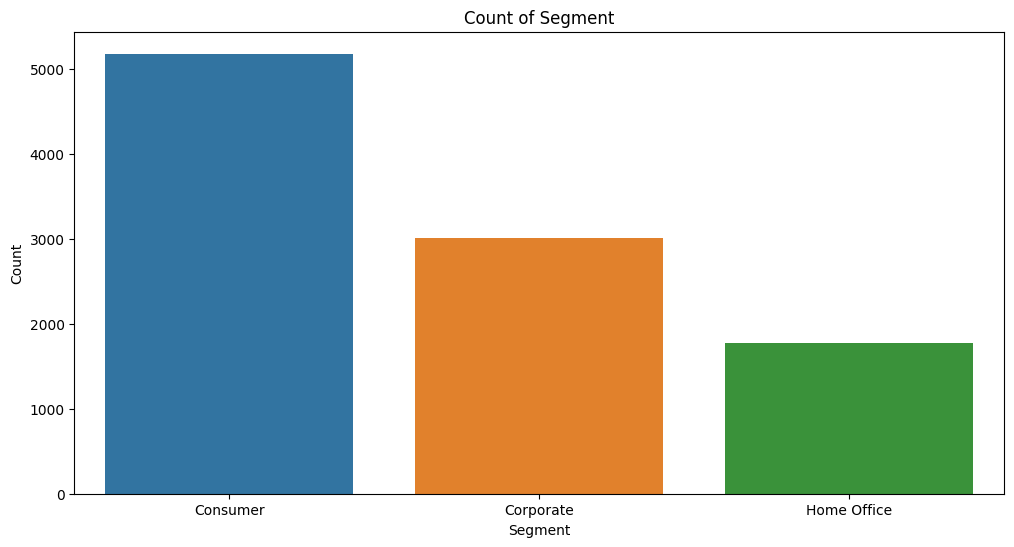

In [22]:
# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Create the count plot
sns.countplot(x='Segment', data=df, hue='Segment')

# Display the plot
plt.title('Count of Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

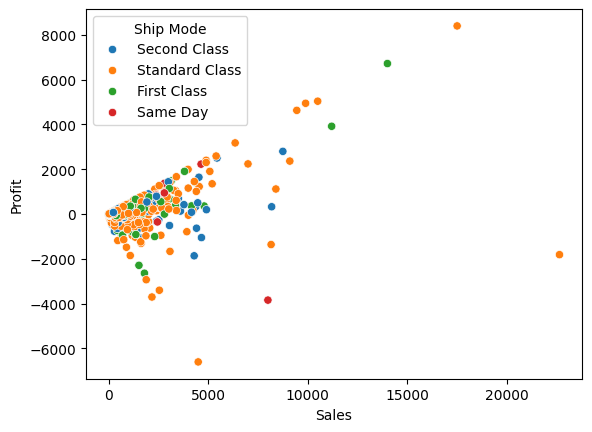

In [20]:
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Ship Mode")
plt.show()

## What is the corr between numrice values?

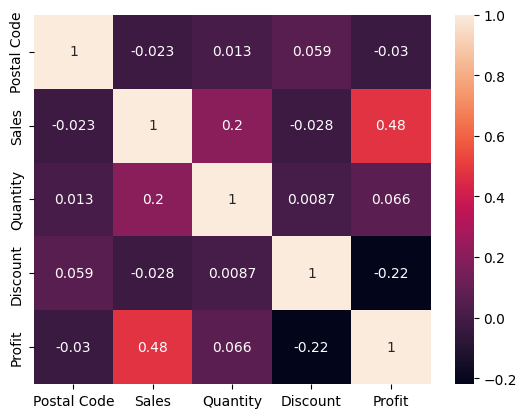

In [19]:
corr=df[["Postal Code","Sales","Quantity","Discount","Profit"]].corr()
sns.heatmap(corr,annot=True)
plt.show()

<ipython-input-21-88c7ea466470>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="State",data=df,palette="Set1")


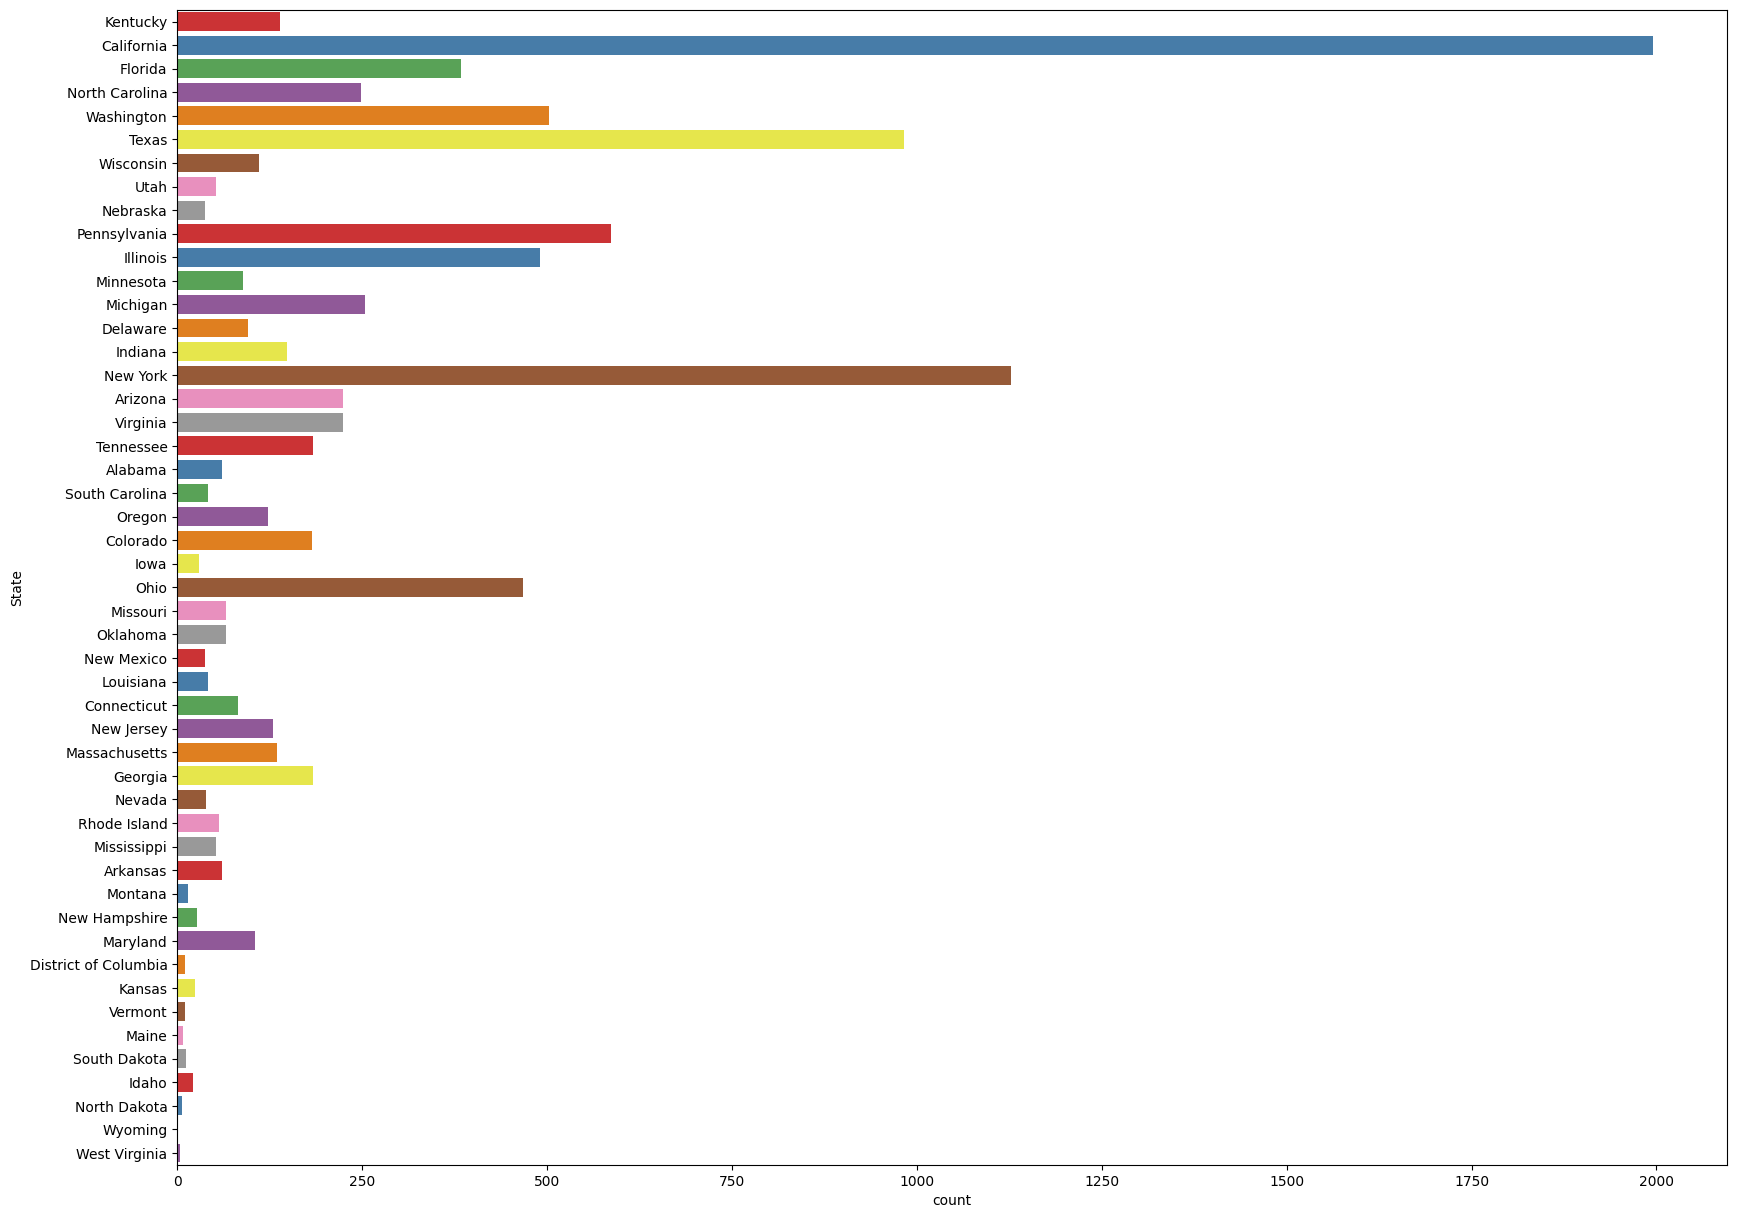

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(y="State",data=df,palette="Set1")
plt.show()

In [23]:
df['Category'].value_counts()

,count
Category,
Office Supplies,6012
Furniture,2118
Technology,1847


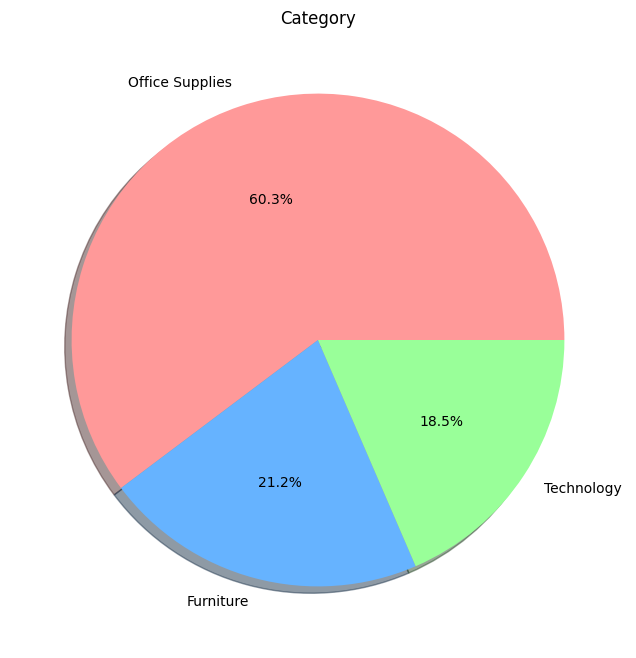

In [31]:
df['Category'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8, 8),
    shadow=True,
    labels=df['Category'].value_counts().index,  # Use specific labels
    colors=['#ff9999', '#66b3ff', '#99ff99']  # Optional custom colors
)
plt.title('Category')
plt.ylabel('')  # Remove the y-axis label for better aesthetics
plt.show()

In [33]:
df['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1522
Paper,1359
Furnishings,956
Phones,889
Storage,846
Art,795
Accessories,775
Chairs,615
Appliances,466


<ipython-input-32-2a98fcea470b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Sub-Category",data=df,palette="Set1")


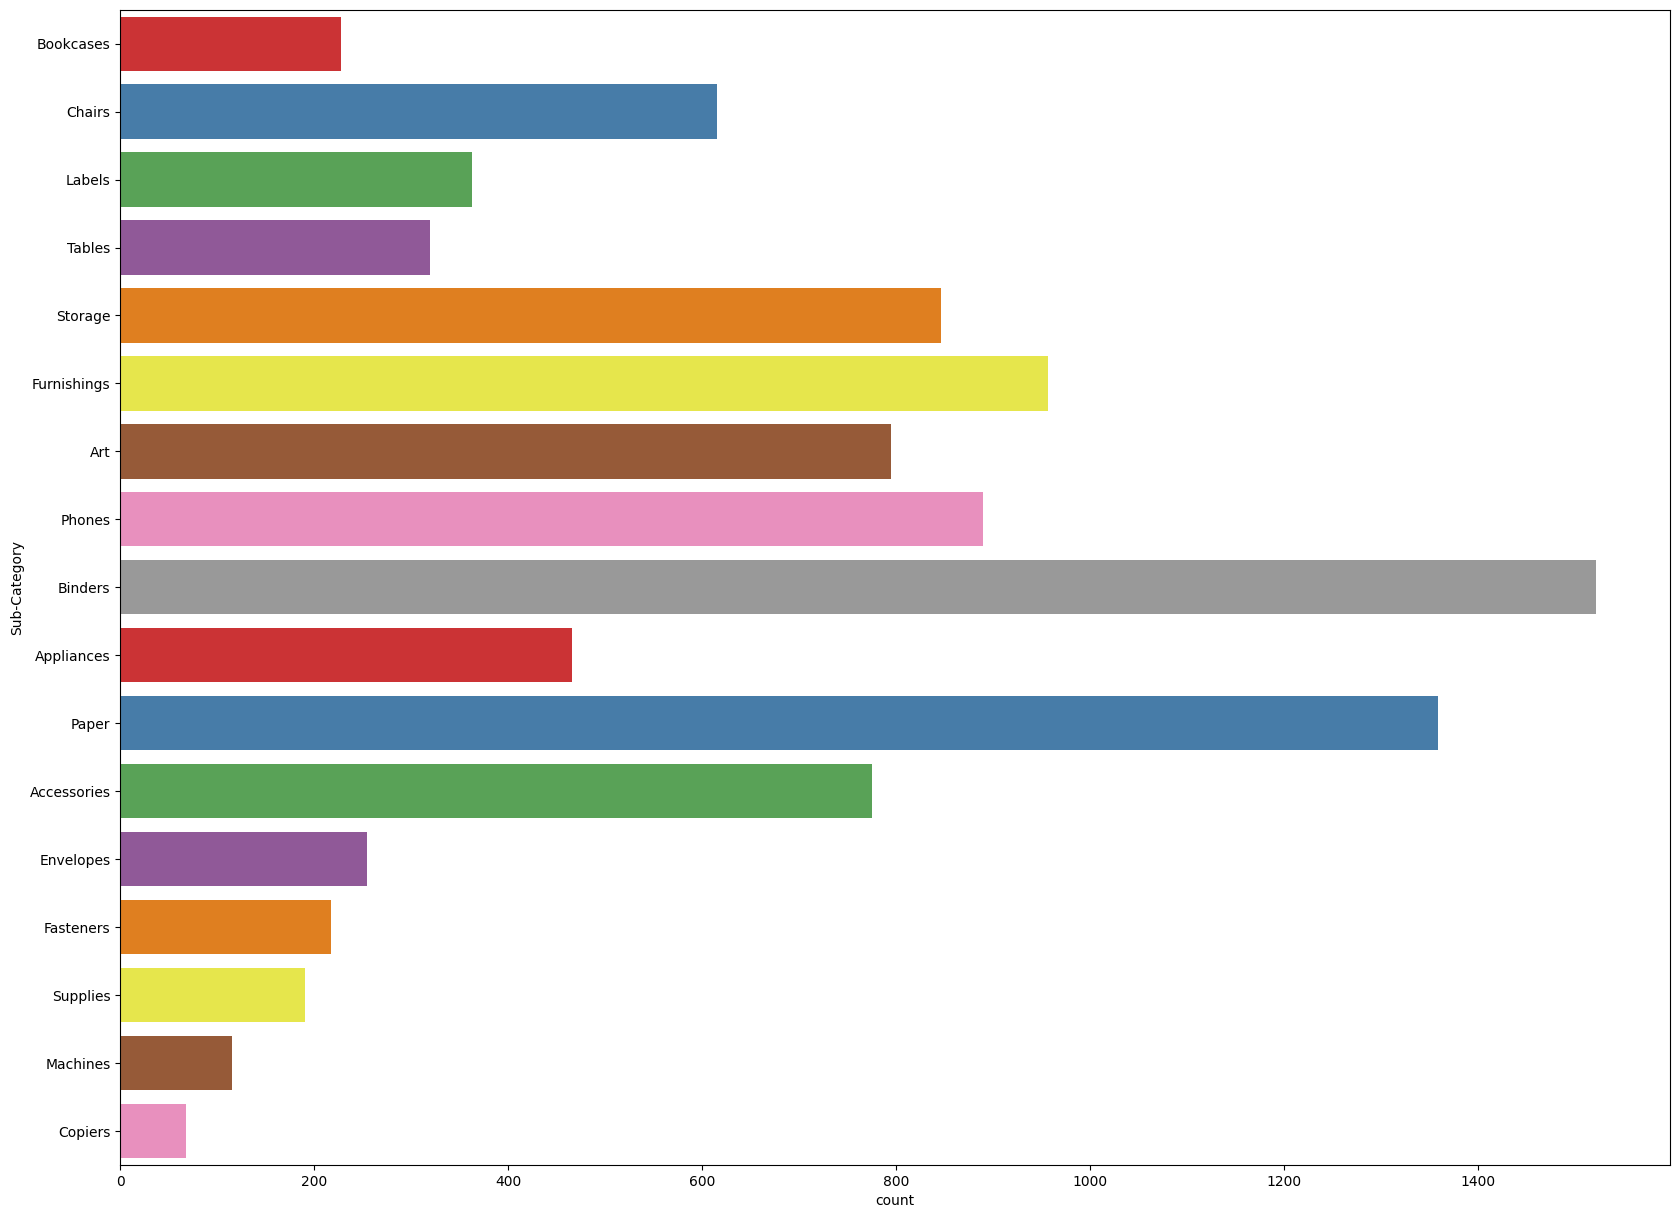

In [32]:
plt.figure(figsize=(20,15))
sns.countplot(y="Sub-Category",data=df,palette="Set1")
plt.show()

In [34]:
df['Region'].value_counts()

,count
Region,
West,3193
East,2845
Central,2319
South,1620


<ipython-input-35-44683c24e089>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Region",data=df,palette="Set1")


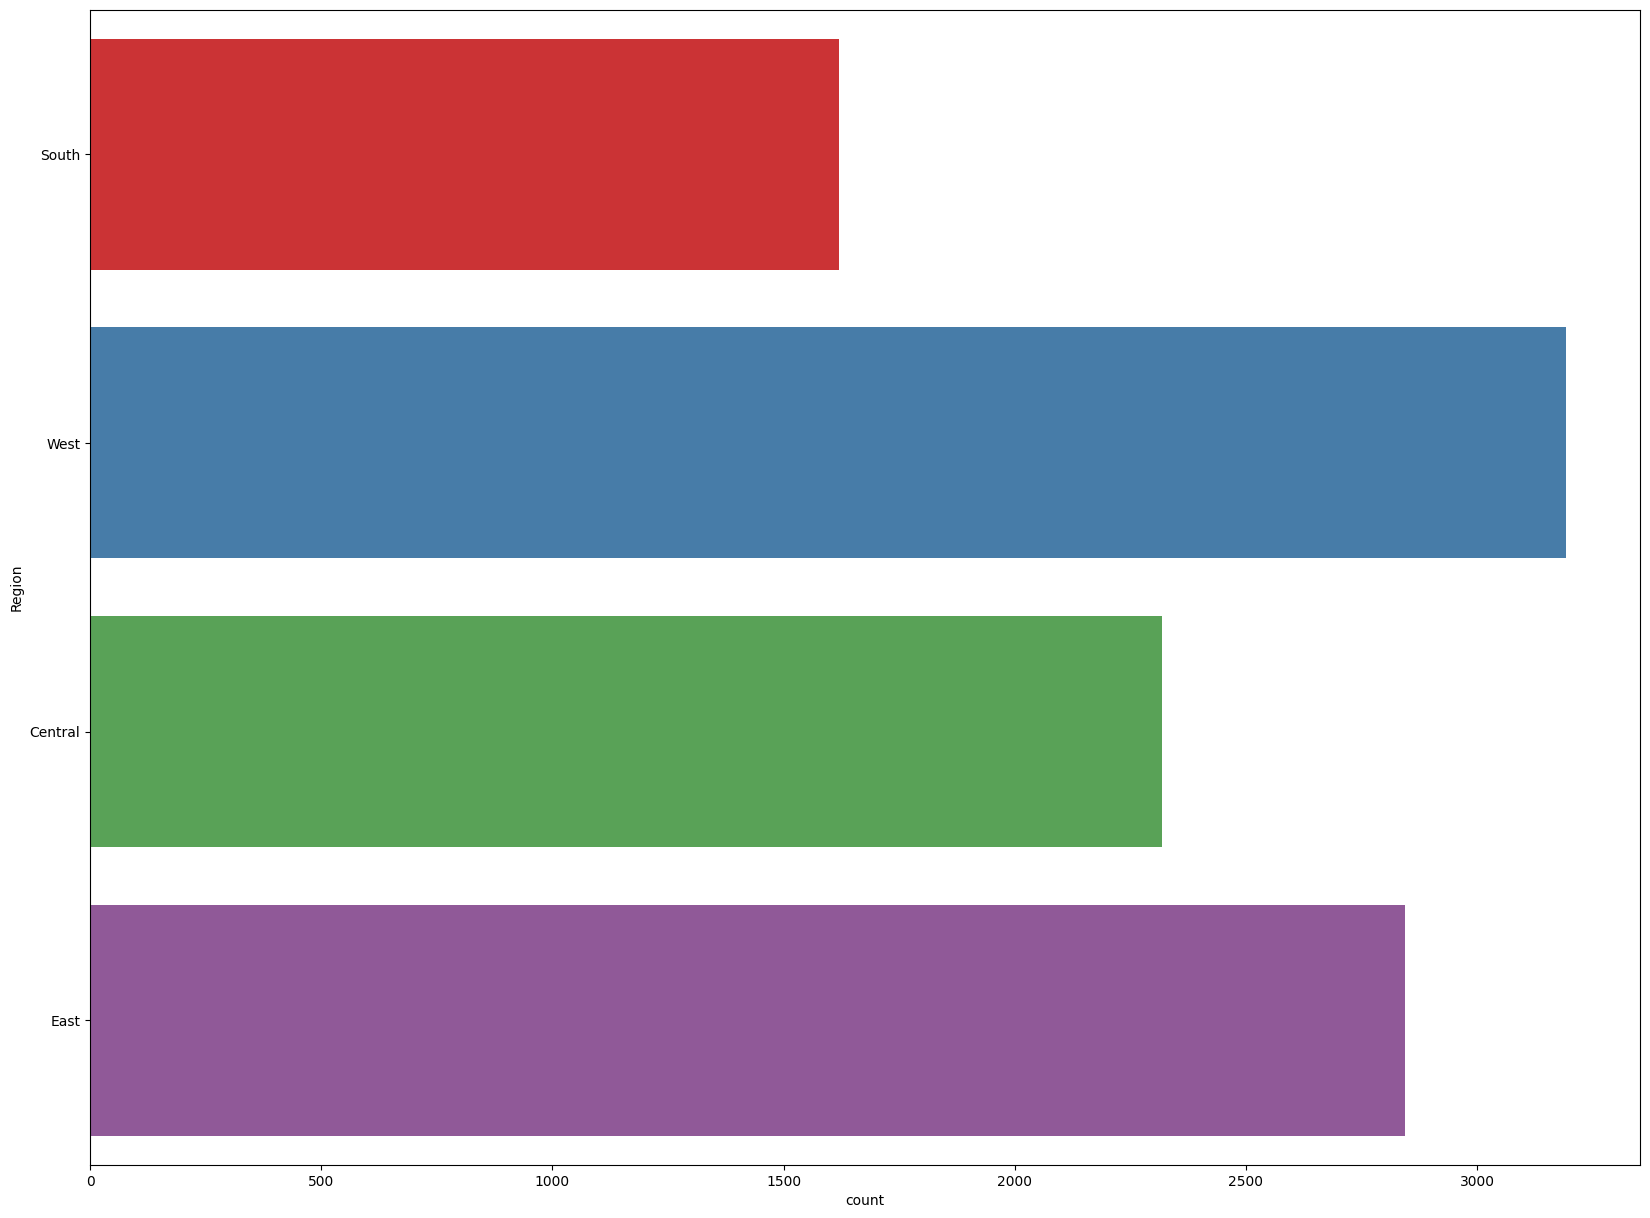

In [35]:
plt.figure(figsize=(20,15))
sns.countplot(y="Region",data=df,palette="Set1")
plt.show()

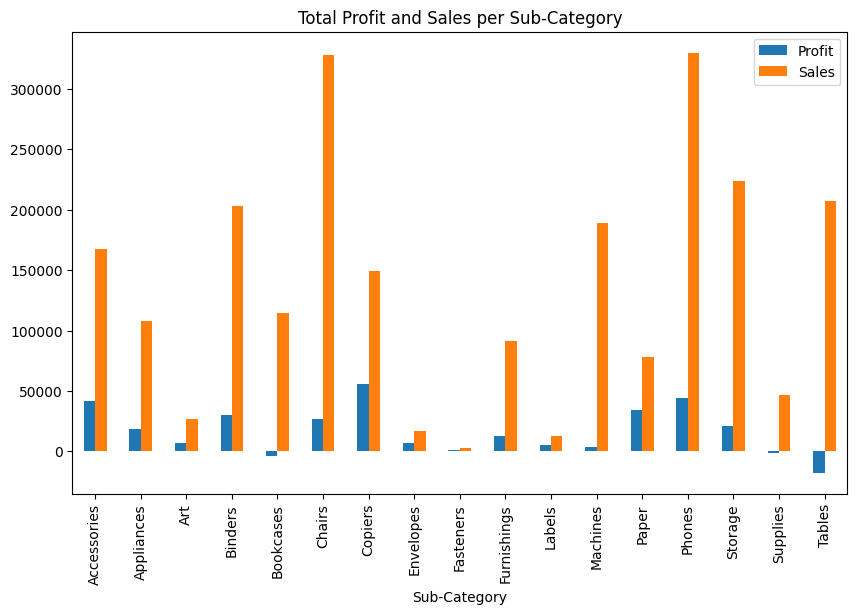

In [29]:
grouped_data = df.groupby('Sub-Category')[['Profit', 'Sales']].agg('sum')
ax = grouped_data.plot.bar(figsize=(10,6))
plt.title('Total Profit and Sales per Sub-Category')
ax.legend(['Profit', 'Sales'])

plt.show()

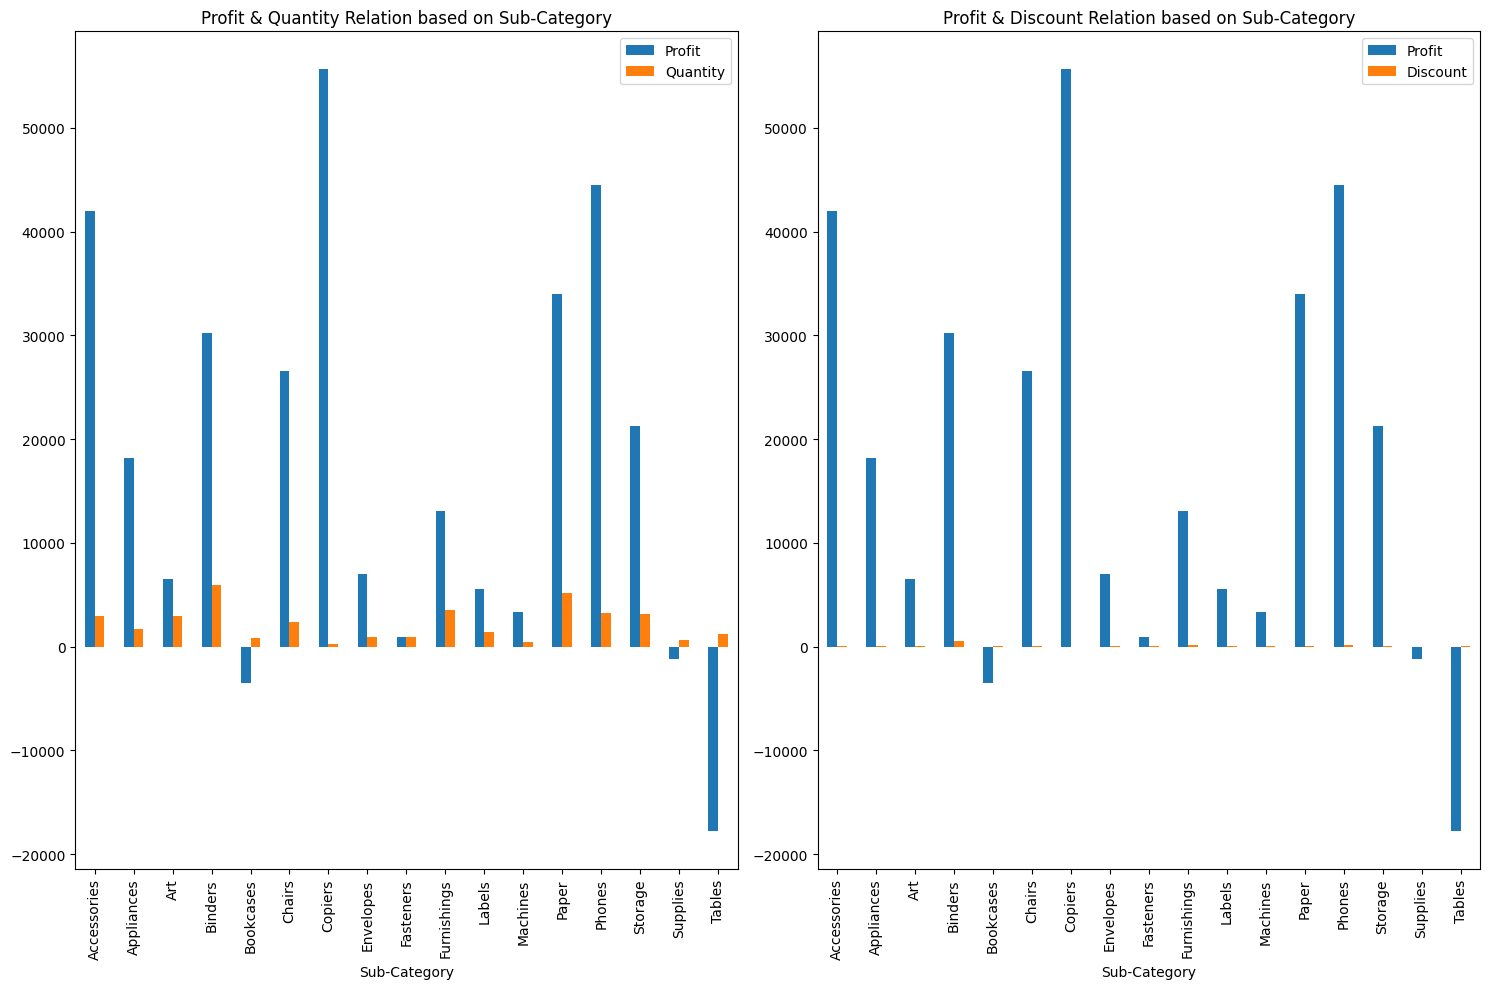

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# First subplot: Profit & Quantity Relation based on Sub-Category
df.groupby('Sub-Category')[['Profit', 'Quantity']].agg('sum').plot(kind='bar', ax=axes[0])
axes[0].set_title('Profit & Quantity Relation based on Sub-Category')

# Second subplot: Profit & Discount Relation based on Sub-Category
df.groupby('Sub-Category')[['Profit', 'Discount']].agg('sum').plot(kind='bar', ax=axes[1])
axes[1].set_title('Profit & Discount Relation based on Sub-Category')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

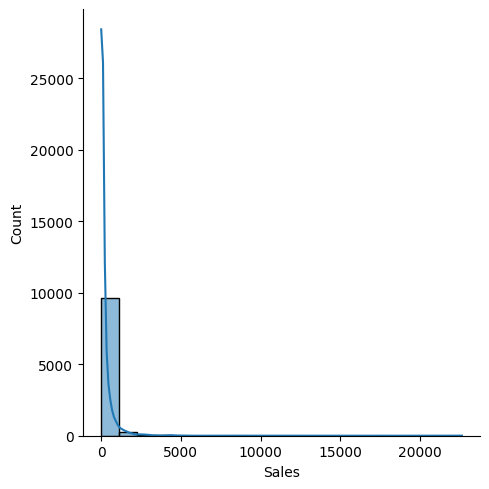

In [37]:
sns.displot(data=df, x="Sales", kde=True,bins=20)

plt.show()

<ipython-input-38-7ae1689b44d6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region',y='Profit',data=df,palette="Set2")


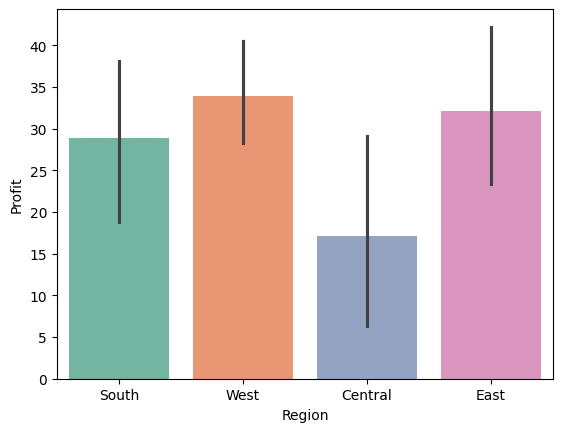

In [38]:
sns.barplot(x='Region',y='Profit',data=df,palette="Set2")
plt.show()

<ipython-input-40-8fdac1fdf34e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='City',x='Profit',data=df[: 30],palette="Set2")


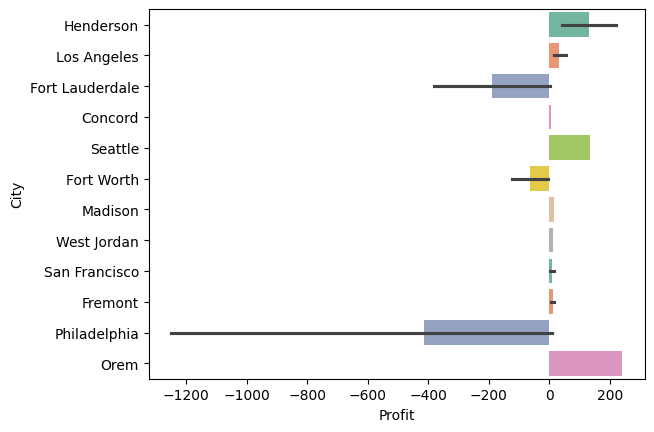

In [40]:
sns.barplot(y='City',x='Profit',data=df[: 30],palette="Set2")
plt.show()

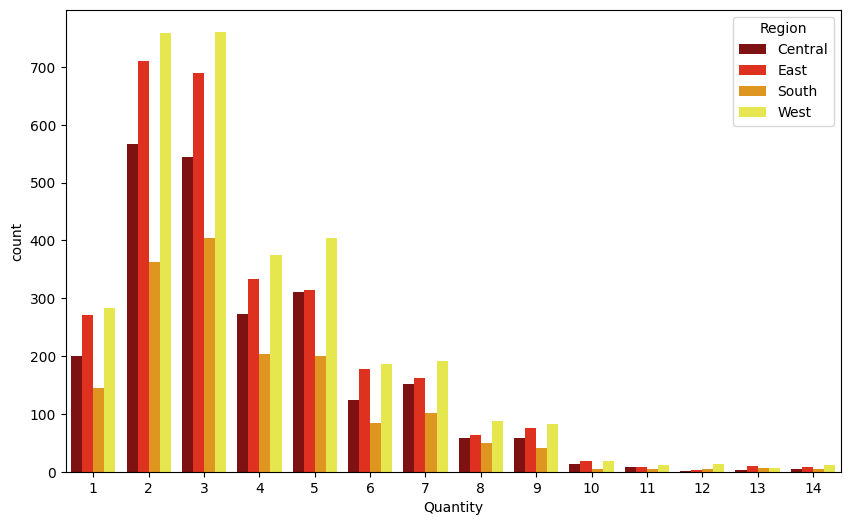

In [41]:
plt.figure(figsize=(10,6))

sns.countplot(x="Quantity",data=df,hue="Region",palette="hot")
plt.show()